<a href="https://colab.research.google.com/github/Njeri-Macharia/data-science-bootcamp/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
# Load the dataset
data = pd.read_csv('/content/data.csv')

# Display the first few rows to explore the data
print(data.head())
# data.tail()#last five rows

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


In [ ]:
data.info()
#summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
data.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [ ]:
# read the sentence of the first row
data['Sentence'].values[0]
# data['Sentiment'].values[0]


"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [ ]:
# the size of the dataset
print(data.shape)

(5842, 2)


## Distribution of the data

<ipython-input-27-b47977ff6f45>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=data, palette="viridis")


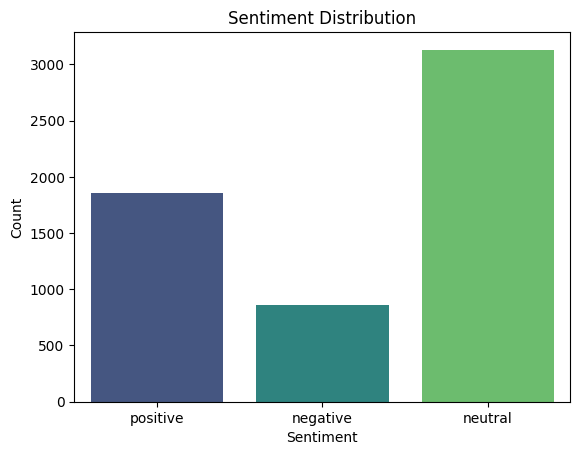

In [ ]:
# plot a graph to see the distribution of data in the Sentiment column
sns.countplot(x="Sentiment", data=data, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Data Cleaning

In [ ]:
# Convert text to lowercase and remove special characters
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & special characters
    return text

data["Cleaned_Sentence"] = data["Sentence"].apply(clean_text)

In [ ]:
# Convert Sentiments into numerical labels
sentiment_mapping = {"positive": 1, "negative": 0, "neutral": 2}
data["Sentiment_Label"] = data["Sentiment"].map(sentiment_mapping)


## Splitting data to training and testing data

In [ ]:
# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    data["Cleaned_Sentence"], data["Sentiment_Label"], test_size=0.2, random_state=42
)

# Machine Learning Model (TF-IDF + Logistic Regression)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7262617621899059
              precision    recall  f1-score   support

           0       0.53      0.17      0.26       175
           1       0.78      0.70      0.74       372
           2       0.72      0.90      0.80       622

    accuracy                           0.73      1169
   macro avg       0.68      0.59      0.60      1169
weighted avg       0.71      0.73      0.70      1169



# Deep Learning Model (LSTM)

In [ ]:
# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)


In [ ]:
# Build LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = lstm_model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=5, batch_size=32)


Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 164ms/step - accuracy: 0.5436 - loss: 0.9749 - val_accuracy: 0.6621 - val_loss: 0.7908
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 37s 142ms/step - accuracy: 0.7265 - loss: 0.6774 - val_accuracy: 0.6929 - val_loss: 0.7090
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8265 - loss: 0.4112 - val_accuracy: 0.7109 - val_loss: 0.7246
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 131ms/step - accuracy: 0.8652 - loss: 0.3055 - val_accuracy: 0.6972 - val_loss: 0.7931
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.8889 - loss: 0.2294 - val_accuracy: 0.6920 - val_loss: 0.8980


In [ ]:
# Evaluate LSTM Model
y_pred_lstm = np.argmax(lstm_model.predict(X_test_seq), axis=1)
print("LSTM Model Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
LSTM Model Accuracy: 0.6920444824636441
              precision    recall  f1-score   support

           0       0.35      0.25      0.29       175
           1       0.78      0.67      0.72       372
           2       0.71      0.83      0.77       622

    accuracy                           0.69      1169
   macro avg       0.61      0.58      0.59      1169
weighted avg       0.68      0.69      0.68      1169



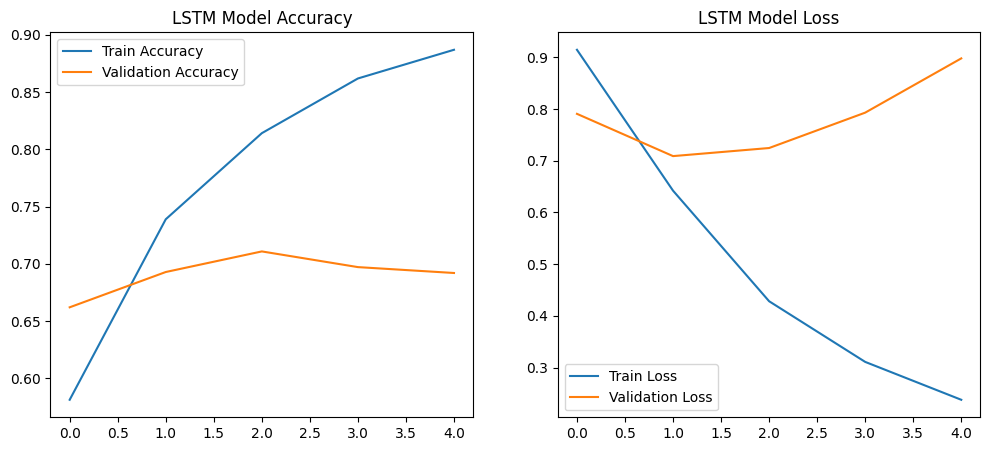

In [ ]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

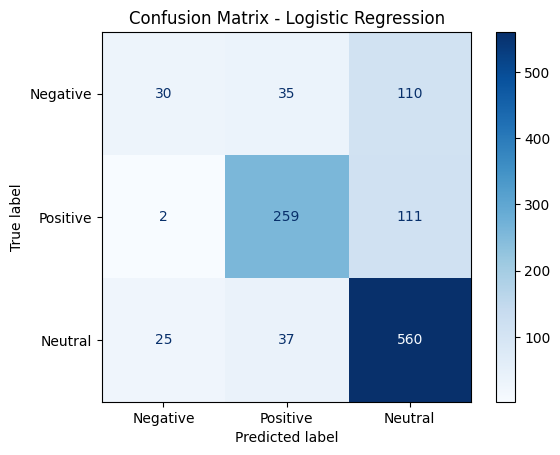

<Figure size 600x600 with 0 Axes>

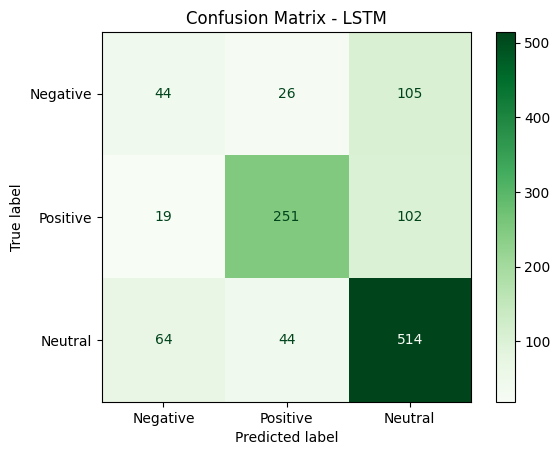

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ----------- Confusion Matrix for Logistic Regression -----------
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Negative", "Positive", "Neutral"])

plt.figure(figsize=(6,6))
disp_lr.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ----------- Confusion Matrix for LSTM -----------
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["Negative", "Positive", "Neutral"])

plt.figure(figsize=(6,6))
disp_lstm.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix - LSTM")
plt.show()
